In [1]:
#Import the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import numpy as np
import matplotlib
import squarify

In [3]:
#Loading the Application data and previous data
Application_data = pd.read_csv("Downloads/application_data.csv")
Previous_data = pd.read_csv("Downloads/previous_application.csv")

In [4]:
#Checking the previous data.
Previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
##For finding more insights and understanding the data in detailed manner we need to merge both the data sets using inner join on SK ID 
complete_data = pd.merge(left=Application_data, right=Previous_data,how='inner', on='SK_ID_CURR',suffixes='_x')


In [6]:
complete_data.shape

(1413701, 158)

In [7]:
Previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
#Evaluating the numerical columns of combined data
complete_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,-1.632105e+04,6.870203e+04,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.452777e+05,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.520100e+04,-1.791200e+04,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,-1.998000e+04,-2.828000e+03,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,-1.604400e+04,-1.281000e+03,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,-1.273900e+04,-2.840000e+02,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
#Now checking the errors and converting the -ve value columns to +ve using ABS function
complete_data.SELLERPLACE_AREA= complete_data.SELLERPLACE_AREA.abs()
complete_data.AMT_DOWN_PAYMENT= complete_data.AMT_DOWN_PAYMENT.abs()
complete_data.DAYS_DECISION= complete_data.DAYS_DECISION.abs()

<AxesSubplot:xlabel='DAYS_LAST_DUE'>

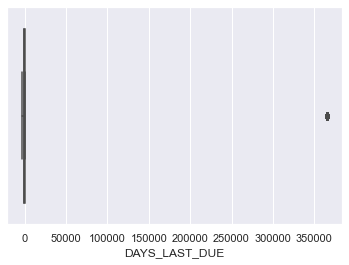

In [10]:
#Checking the boxplot of DAYS_LAST_DUE
sns.boxplot(complete_data.DAYS_LAST_DUE)
#This is an outlier as days can't be greater than 1000 days which is roughly 3 years .

<AxesSubplot:xlabel='AMT_CREDIT_'>

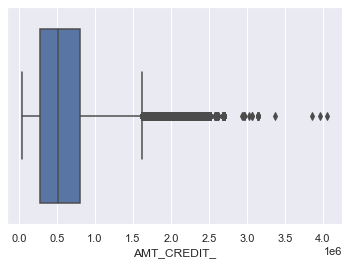

In [11]:
#Checking the boxplot of AMT_CREDIT
sns.boxplot(complete_data.AMT_CREDIT_)
#multiple outliers can be seen in the amount credit.

In [12]:
complete_data.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

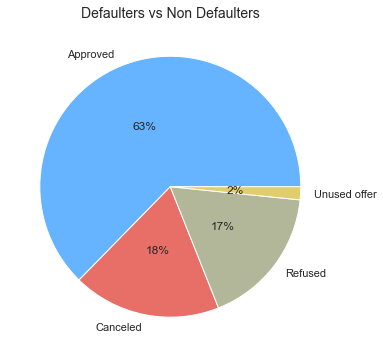

In [13]:
cstatus = complete_data.groupby("NAME_CONTRACT_STATUS")["NAME_CONTRACT_STATUS"].value_counts()
#groupby Status

pie, ax = plt.subplots(figsize=[10,6])
labels = ['Approved','Canceled','Refused','Unused offer']
colors = ['#66b3ff', '#e86f68','#b3b799','#e2cd6d']
plt.pie(x=cstatus, autopct="%.0f%%", labels=labels, pctdistance=0.5,colors=colors)
plt.title("Defaulters vs Non Defaulters", fontsize=14);

In [14]:
#dividing the new dataframe into 4 parts based on the contract status, i.e: Approved, refused, canceled, unused
approved = complete_data[complete_data['NAME_CONTRACT_STATUS']=='Approved']
refused = complete_data[complete_data['NAME_CONTRACT_STATUS']=='Refused']
canceled = complete_data[complete_data['NAME_CONTRACT_STATUS']=='Canceled']
unused = complete_data[complete_data['NAME_CONTRACT_STATUS']=='Unused offer']

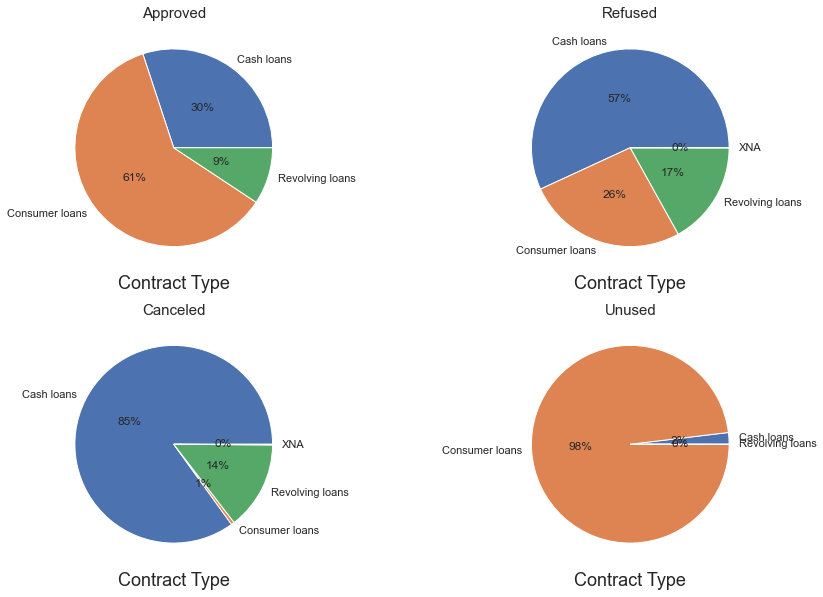

In [15]:
app = approved.groupby("NAME_CONTRACT_TYPEx")["NAME_CONTRACT_TYPEx"].value_counts()
ref = refused.groupby("NAME_CONTRACT_TYPEx")["NAME_CONTRACT_TYPEx"].value_counts()
can = canceled.groupby("NAME_CONTRACT_TYPEx")["NAME_CONTRACT_TYPEx"].value_counts()
unu = unused.groupby("NAME_CONTRACT_TYPEx")["NAME_CONTRACT_TYPEx"].value_counts()

label1 = ['Cash loans', 'Consumer loans', 'Revolving loans']
label2 = ['Cash loans', 'Consumer loans', 'Revolving loans','XNA']


plt.figure(figsize=(15,10)) 

plt.subplot(2,2,1)
values=app
ax = plt.pie(x=values, autopct="%.0f%%",  pctdistance=0.5,labels=label1)
plt.title('Approved',fontsize=15)
plt.xlabel('Contract Type', fontsize=18)
plt.xticks(rotation=90)



plt.subplot(2,2,2)
values=ref
ax = plt.pie(x=values, autopct="%.0f%%",  pctdistance=0.5,labels=label2)
plt.title('Refused',fontsize=15)
plt.xlabel('Contract Type', fontsize=18)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
values=can
ax = plt.pie(x=values, autopct="%.0f%%",  pctdistance=0.5,labels=label2)
plt.title('Canceled',fontsize=15)
plt.xlabel('Contract Type', fontsize=18)
plt.xticks(rotation=90)



plt.subplot(2,2,4)
values=unu
ax = plt.pie(x=values, autopct="%.0f%%",  pctdistance=0.5,labels=label1)
plt.title('Unused',fontsize=15)
plt.xlabel('Contract Type', fontsize=18)
plt.xticks(rotation=90)


plt.show()
#Here we can see that consumer loan is much more acceptable as compare to the cash and revolving loans.


In [16]:
def multi_plot(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=refused,x=variable_name)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    ax1.patch.set_facecolor('White')

    ax2 = sns.countplot(ax=ax2,data=approved,x=variable_name)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax2.patch.set_facecolor('White')

    ax3 = sns.countplot(ax=ax3,data=canceled,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
    ax3.patch.set_facecolor('White')

    ax4 = sns.countplot(ax=ax4,data=unused,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    ax4.patch.set_facecolor('White')
    
    plt.show()

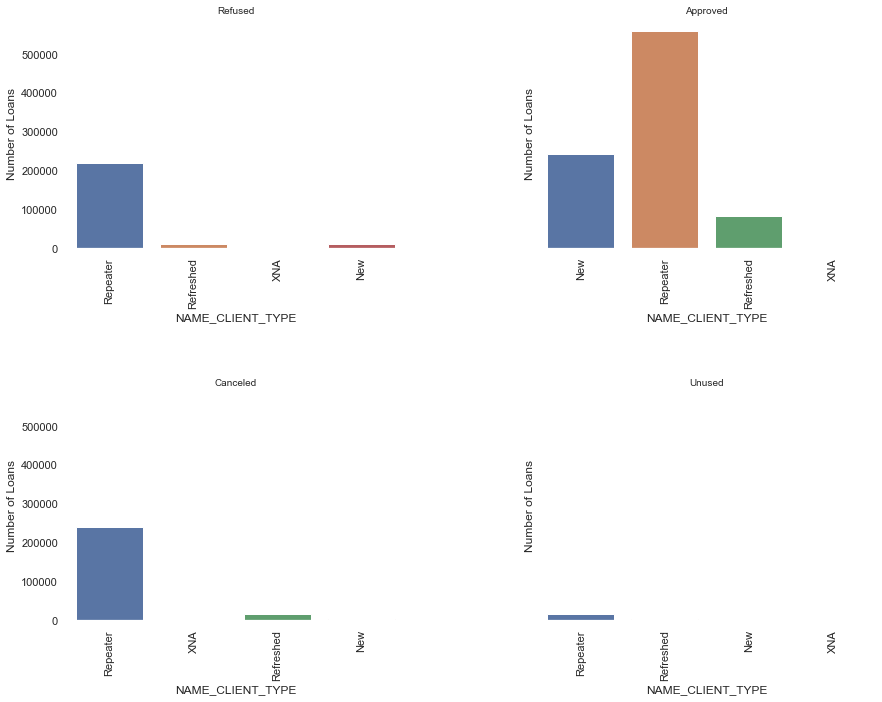

In [17]:
multi_plot('NAME_CLIENT_TYPE')
#Here we can see that the Repeater is getting more Refused but also we can see that the it also getting more apporved and even that it is getting more canceled and more usused.

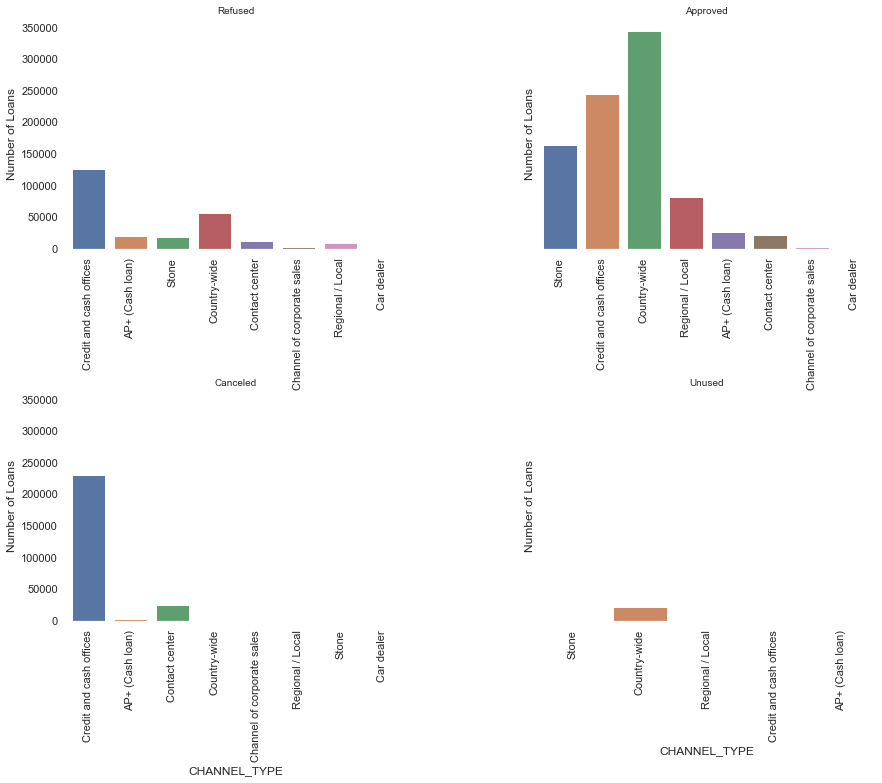

In [18]:
multi_plot('CHANNEL_TYPE')
#The most approved loan has channel type country-wide while the most refused and canceled loan is from credit and cash office

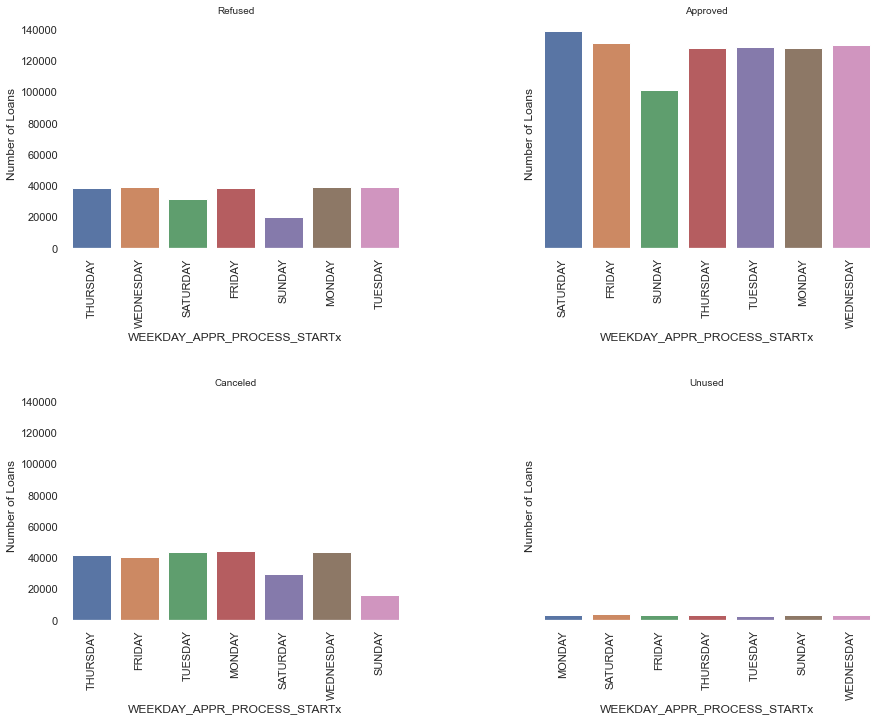

In [20]:
multi_plot('WEEKDAY_APPR_PROCESS_STARTx')
#Loan where least refused on sunday and approved more on saturday

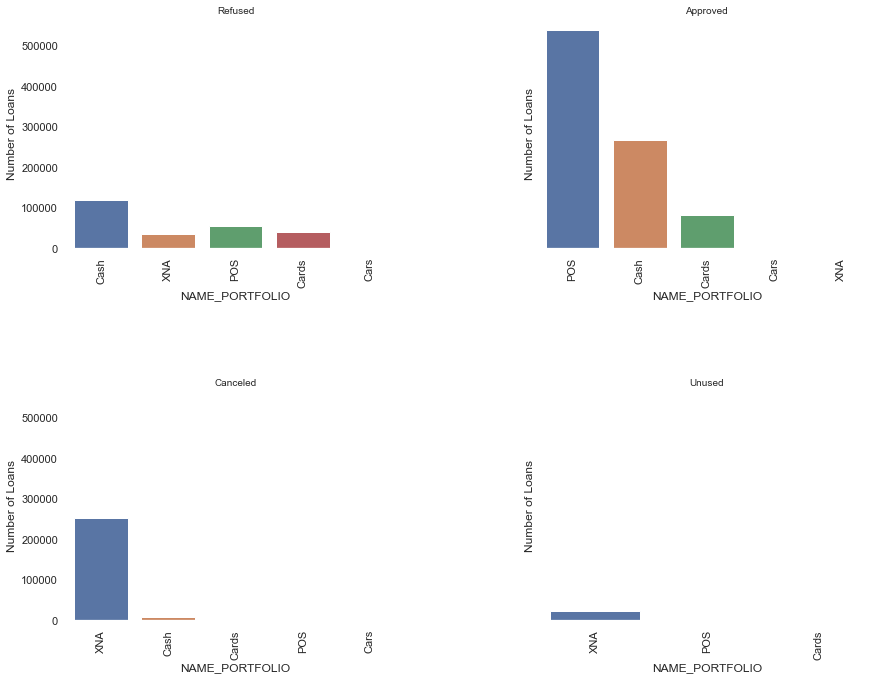

In [21]:
multi_plot('NAME_PORTFOLIO')
#Here most approved loan were through POS and Most refused loans were in cash

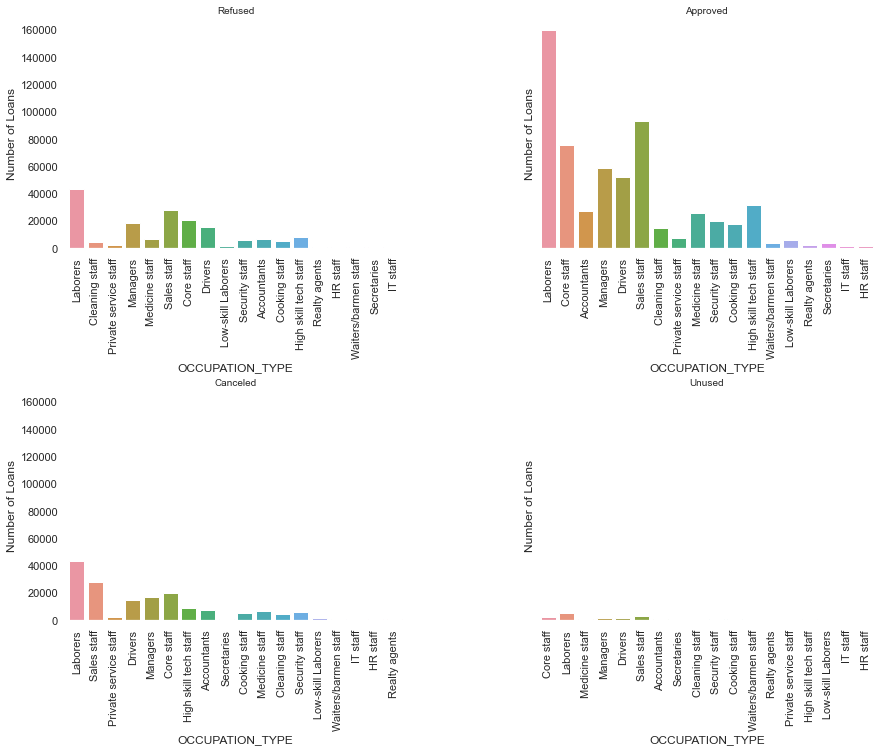

In [22]:
multi_plot('OCCUPATION_TYPE')
#Here laborers are getting most refused and most approved loans. And aslo Sales staff is also getting the second most refused and approved loans.

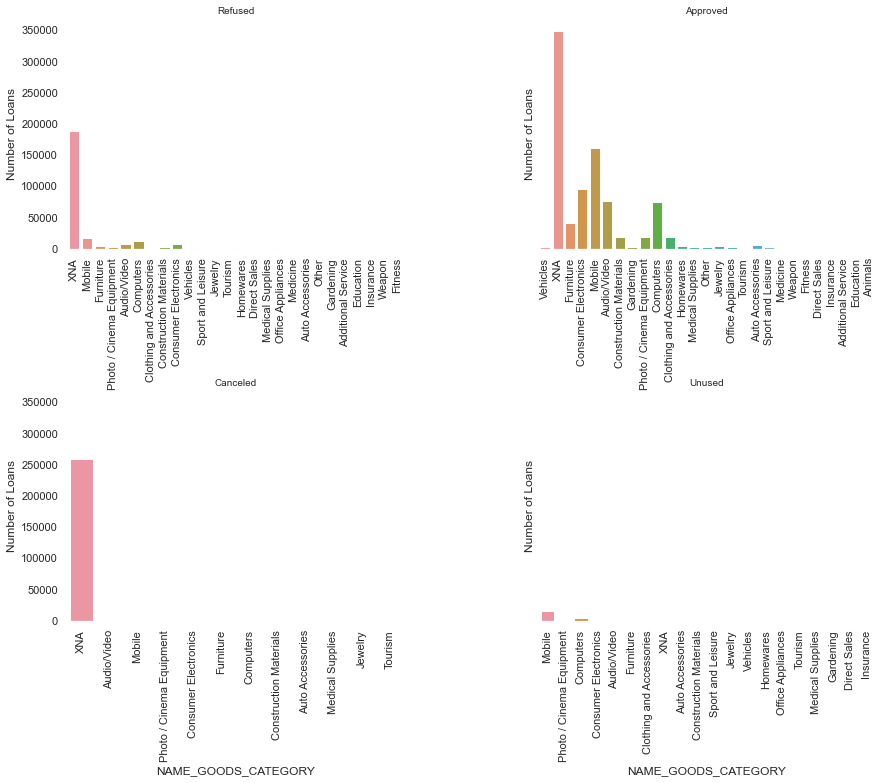

In [23]:
multi_plot('NAME_GOODS_CATEGORY')
#Here Most Refused loan is of Mobile and most approved loan is Mobile

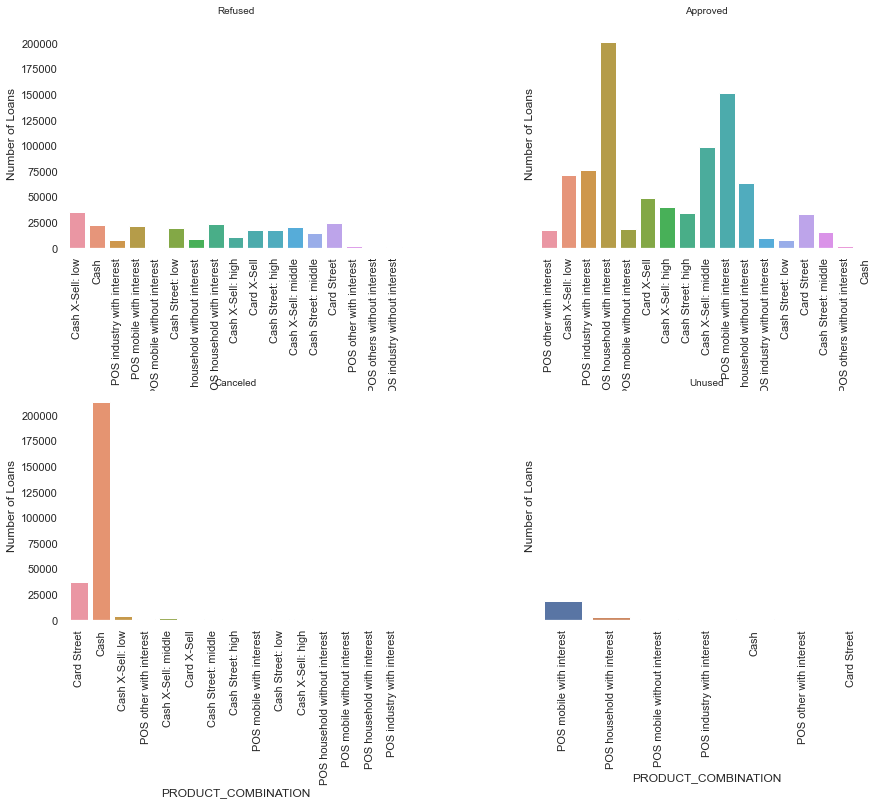

In [24]:
multi_plot('PRODUCT_COMBINATION')
#The most accepting loan is OS household with interest low And most canceled loan is Cash and Most Unused loan is POS mobile with interest.

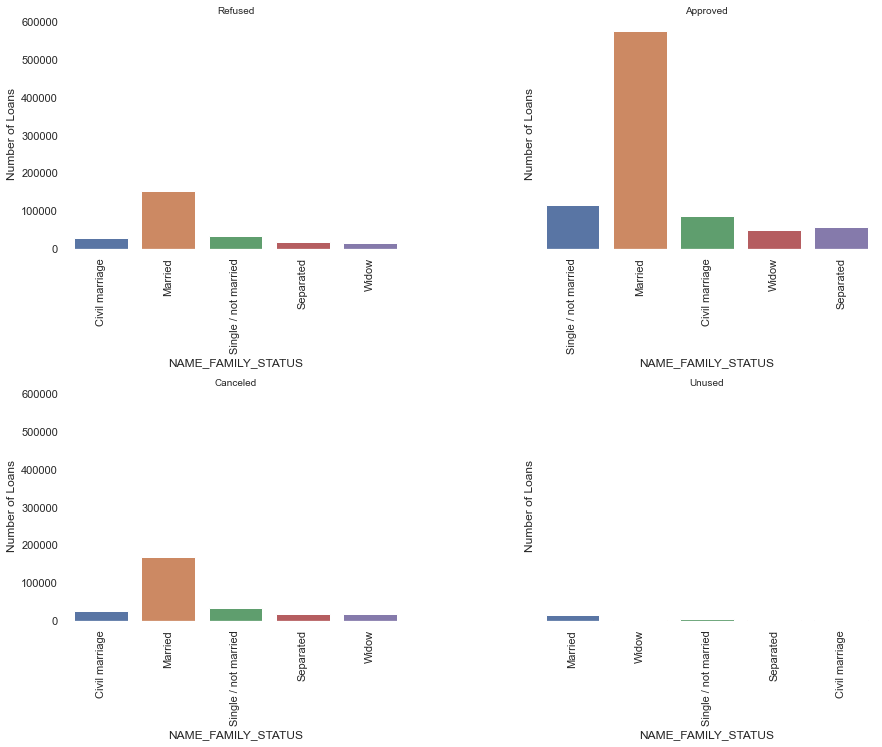

In [25]:
multi_plot('NAME_FAMILY_STATUS')
#Here we can see that the Married people are applying and taking loans more than the others.

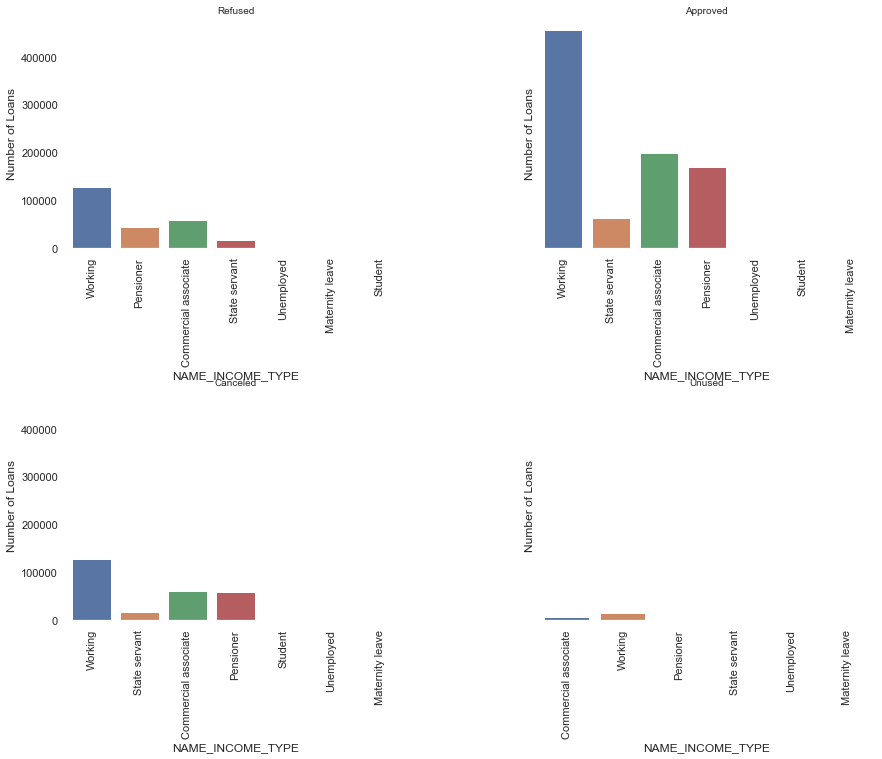

In [26]:
multi_plot('NAME_INCOME_TYPE')
#Here we can see that the working type people are applying more loans as compare to others and also Commercial associates people are taking more loans.

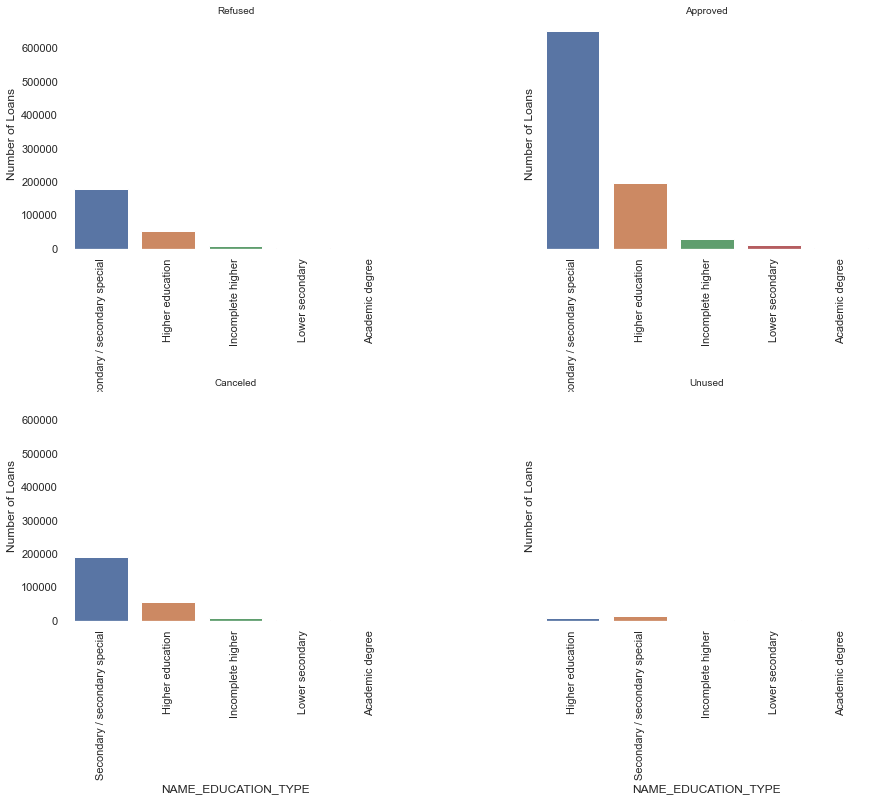

In [27]:
multi_plot('NAME_EDUCATION_TYPE')
#Here we can see that Secondary/ Secondary special is more effective in every case